# 1. Clustering

군집분석(Clustering)이란, 유사한 속성을 갖는 객체들을 묶어 전체 객체들을 몇 개의 그룹 또는 군집(Cluster)으로 나누는 것으로, 대표적인 알고리즘으로는 아래와 같은 것들이 있다.
* K-Means
* Hierarchical Clustering
* Gaussian Mixture Model
* DB-Scan

In [2]:
# 공통 모듈 임포트
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

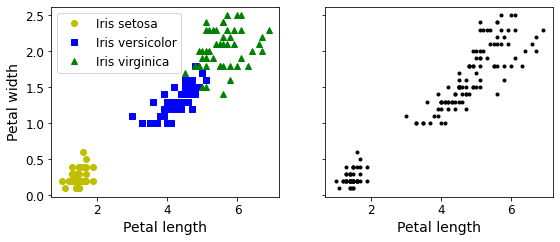

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

분류와 마찬가지로 각 샘플은 하나의 그룹에 할당된다. 하지만 분류와 달리 군집은 비지도학습이다. 위 그림에서 왼쪽은 iris 데이터셋이다. 각 샘플의 품종이 구분되어 나타나 있으므로 이 데이터셋은 레이블이 되어있다. 오른쪽은 동일한 데이터셋이지만 레이블이 없기 때문에 분류 알고리즘이 아닌 군집 알고리즘이 필요한 경우이다.

# 1.1 K-Means

In [6]:
from sklearn.datasets import make_blobs

In [7]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [8]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

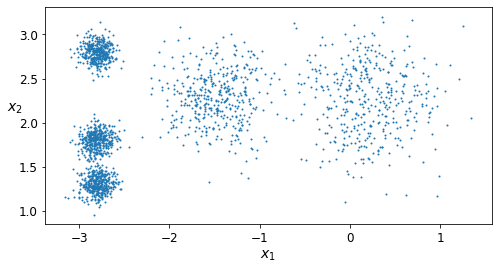

In [10]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

위와 같은 레이블이 없는 데이터셋의 경우, 샘플 덩어리 5개가 잘 보인다. K-Means는 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘이다. 

In [26]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

K-Means 알고리즘은 알고리즘이 찾을 클러스터 갯수 k를 지정해야 한다. 각 샘플은 지정한 갯수의 클러스터 중 하나에 할당된다.

In [12]:
y_pred

array([4, 2, 1, ..., 0, 1, 2], dtype=int32)

In [18]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [15]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [16]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

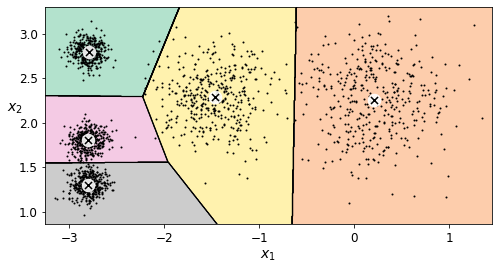

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

클러스터의 결정 경계를 그려보면 위와 같이 되어있다. 샘플은 대부분 적절한 클러스터에 잘 할당되었지만 샘플 몇 개는 레이블이 잘못 부여되어있다. 실제로 K-Means 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문이다.

샘플을 하나의 클러스터에 할당하는 것(**하드 군집**)보다 클러스터마다 샘플에 점수를 부여하는 것(**소프트 군집**)이 유용할 수도 있다.

In [21]:
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

## 1.1.1 K-Means 작동 방식

K-Means가 작동하는 방식은 다음과 같다.
1. 센트로이드를 랜덤하게 선정한다.
2. 샘플에 가장 가까운 센트로이드의 클러스터를 할당한다.
3. 각 클러스터에 속한 샘플의 평균을 계산하여 센트로이드를 업데이트 한다.
4. 1~3을 센트로이드에 변화가 없을 때까지 반복한다.

In [22]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=9)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=9)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=9)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=9)

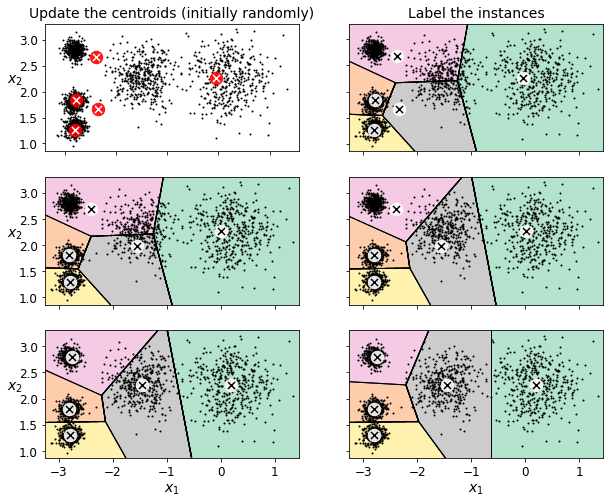

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

## 1.1.2 센트로이드 초기화 방법

센트로이드 위치를 근사하게 안 수 있다면 *init* 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 *n_init*을 1로 설정할 수 있다.

In [24]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

또 다른 방법은 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것이다. 랜덤 초기화 횟수는 *n_init* 매개변수로 조절한다. 이는 fit() 메서드를 호출할 때 전체 알고리즘이 설정한 수만큼 실행된다는 뜻이다.

최선의 솔루션은 성능 지표를 통해 결정된다. 이 성능 지표는 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리이며 모델이 이너셔라고 부른다.

In [27]:
kmeans.inertia_

211.5985372581683

In [28]:
kmeans.score(X)

-211.5985372581683

## 1.1.3 최적의 클러스터 갯수 찾기

일반적으로 클러스터 갯수를 설정할지 쉽게 알 수 없다. 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표는 아니다. 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 되기 때문에 이너셔는 더 작아질 것이다.

In [29]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

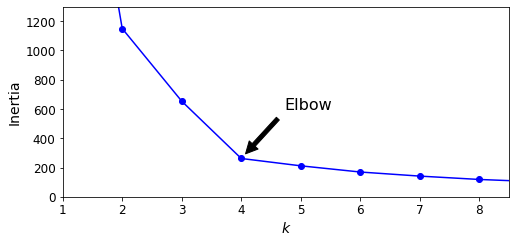

In [30]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

위 그림은 이너셔의 감소폭이 급격히 줄어드는 지점을 선택하는 엘보우 방법을 보여준다.

엘보우 방법 대신 더 정확한 방법은 **실루엣 점수(Silhouette Score)** 이다. 이 값은 모든 샘플에 대한 실루엣 계수의 평균이다. 샘플의 실루엣 계수는 (b-a)/max(a,b)로 게산한다. 여기에서 a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리이다(즉 클러스터 내부의 평균 거리). b는 가장 가까운 클러스터까지 평균 거리이다(즉 가장가까운 클러스터의 샘플까지 평균 거리. 샘플과 가장 가까운 클러스터는 자신이 속한 클러스터느 제외하고 b가 최소인 클러스터이다).

실루엣 계수는 -1에서 +1까지 바뀔 수 있고, +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 뜻이다. 실루엣 계수가 0에 가까우면 클러스터 경계에 위치한다는 의미이고 -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미이다.

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [32]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

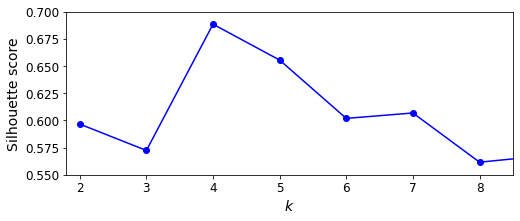

In [33]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

## 1.1.4 K-Means의 한계

K-Means는 속도가 빠르고 확장이 용이하지만, 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 하고 클러스터 갯수를 지정해야 한다. 또한 K-Means는 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

In [34]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

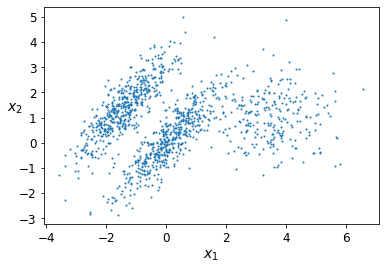

In [35]:
plot_clusters(X)

In [36]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

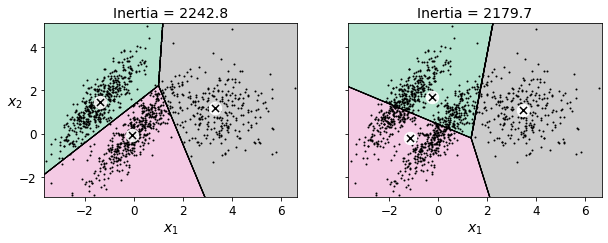

In [38]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

위와 같이 크기와 밀집도, 방향이 다른 세 개의 타원형 클러스터를 가진 데이터셋에 K-Means를 사용했을 경우 군집이 잘 형성되지 않는다. 이런 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

* K-Mean를 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요하다. 그렇지 않으면 클러스터가 길쭉해지고 결과가 좋지 않다.

# 1.2 DBSCAN

이 알고리즘은 밀집된 연속적 지역을 클러스터로 정의한다.
* 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$ 내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 샘플의 $\epsilon$-이웃이라고 부른다.
* (자기 자신을 포함해) $\epsilon$-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플로 간주한다. 즉 핵심 샘플은 밀집된 지역에 있는 샘플이다.
* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
* 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단한다.
  
이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않는 지역과 잘 구분될 때 좋은 성능을 낸다.

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [40]:
dbscan.labels_

array([ 0,  0,  1,  2,  0,  1,  3,  1,  1,  0,  0,  0,  1,  4,  4,  0,  1,
        2,  5,  4, -1,  3,  4,  4,  2,  2,  4,  1,  0,  1,  0,  1, -1,  6,
        5,  1,  2,  0,  1,  4,  0,  7,  1,  1,  1, -1,  3,  7,  1,  6,  5,
        1,  1,  6,  1,  4,  0,  1, 10,  0,  7,  2, -1,  0,  0,  2,  0,  2,
        1,  5,  6,  0,  6, -1,  0,  3,  1,  4,  0,  0,  4,  2,  4,  1, -1,
        1,  1,  0, -1,  0,  0,  0, -1,  6,  0,  4,  4,  2,  2,  2,  8,  0,
        3,  3,  2,  4,  9,  5, -1,  0,  2,  3, -1,  5,  1,  0,  8,  0,  6,
        2,  7,  6,  2,  6,  2,  1,  0,  1,  6,  7, -1,  1, -1, -1, -1,  4,
        0,  1,  2,  6,  0,  2,  1,  1,  0,  1,  8,  4,  6,  4,  0,  6,  4,
        0,  4,  0,  0,  6,  0,  0,  1, -1, -1,  4,  4, -1,  3,  1,  2,  5,
        3,  4,  1,  7,  4,  4,  7,  6,  7,  0,  5,  0,  6,  6, -1,  3,  1,
        0,  0,  4,  1,  4, -1,  1, -1,  1,  1,  0,  2,  3,  1,  4,  2,  7,
        0,  1, -1,  1,  0,  6,  4,  6,  7,  0,  0,  6,  3,  0,  2,  0, -1,
        8,  6,  7,  3,  2

일부 샘플의 클러스터 인덱스는 -1인데, 이는 알고리즘이 이 샘플을 이상치로 판단했다는 의미이다.

In [41]:
len(dbscan.core_sample_indices_)

800

In [42]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  15,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  33,  34,  35,  36,  37,  39,  41,  42,  43,  44,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,  60,
        63,  64,  65,  66,  68,  70,  71,  72,  74,  76,  77,  78,  79,
        80,  81,  82,  83,  85,  86,  87,  89,  90,  91,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 107, 109, 110,
       111, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 135, 136, 138, 139, 140, 141, 142, 143, 145, 146,
       148, 149, 150, 152, 154, 155, 156, 157, 158, 159, 160, 164, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180,
       181, 182, 185, 186, 187, 188, 190, 191, 193, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 212, 214,
       215, 216, 217, 218, 219, 221, 224, 225, 226, 227, 228, 23

In [43]:
dbscan.components_

array([[-0.09564591,  0.95848114],
       [ 0.56284841,  0.87142489],
       [ 1.44116314, -0.45223413],
       ...,
       [-0.61798963,  0.76151327],
       [-1.01088989,  0.1670886 ],
       [-0.34121912,  0.88805687]])

In [45]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [44]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

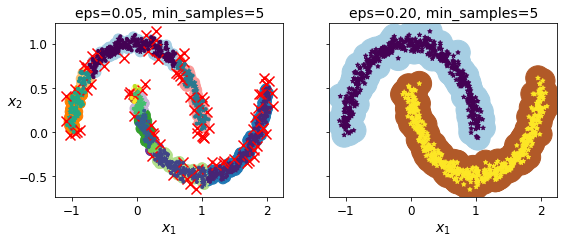

In [46]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


DBSCAN 클래스는 predict() 메서드를 제공하지 않고 fit_predict() 메서드를 제공한다. 즉 이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없다. 이런 구현 결정은 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 때문이다.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [48]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([6, 7, 4, 1])

In [49]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.92, 0.04, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.3 , 0.  , 0.  , 0.  , 0.64, 0.  , 0.02, 0.02],
       [0.  , 0.08, 0.28, 0.  , 0.64, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

DBSCAN은 매우 간단하지만 강력한 알고리즘이다. 클러스터의 모양과 개수에 상관없이 감지할 수 있고 이상치에 안정적이며 하이퍼파라미터가 두 개뿐이다(eps, min_samples). 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다. 계속 복잡도는 대략 $O(m\log m)$이다.